In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

### Choosing Highly Prioritized Cohesive Communitites 

In [5]:
# reading the CRank output text file for the cohesive communities from CoDA
cohesive_comm = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\cmtin_out.txt',
                            sep='\t')

In [6]:
cohesive_comm.head()

,Community,CRank,Conductance,Modularity,Random
0,407040,0.720221,0.608515,0.027874,0.000078
1,6135,1.000000,0.556884,0.048757,0.315378
2,10992,1.000000,0.611450,0.037687,0.556053
3,283373,0.160662,0.697382,0.010022,0.586501
4,29889,0.542628,0.646845,0.023750,0.327672


In [7]:
# ranking the cohesive communities based on the CRank value
# ranking is performed twice where one keeps the original index
cohesive_comm_idx = cohesive_comm.sort_values(by='CRank', ascending=False, ignore_index=False)
cohesive_comm.sort_values(by='CRank', ascending=False, inplace=True, ignore_index=True)

In [8]:
# index is used to identify communities with a CRank score that is greater than 0.8 
# in the mobaxterm text file (contains an index) of cohesive communites

# each selected community is pasted into an indvidual text file and saved with a relevant title 
# (e.g. 1_coh_com73.txt - 1=rank#1, coh=cohesive, com73 - community name)
cohesive_comm_idx.head(25)

,Community,CRank,Conductance,Modularity,Random
72,C0036572,1.000000,0.964887,0.000168,0.770818
1,6135,1.000000,0.556884,0.048757,0.315378
29,4914,1.000000,0.786781,0.009791,0.011906
74,112399,1.000000,0.834224,0.006575,0.297474
12,64963,1.000000,0.760624,0.014314,0.309653
51,10980,1.000000,0.838102,0.005924,0.777318
40,200728,1.000000,0.800026,0.009957,0.470389
6,9343,1.000000,0.763955,0.006874,0.470446
30,25776,1.000000,0.812801,0.008446,0.103208
2,10992,1.000000,0.611450,0.037687,0.556053


### Choosing Highly Prioritized 2-mode Communitites 

In [9]:
# reading the CRank output text file for the 2-mode communities from CoDA
mode2_comm = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\cmtout_out.txt',
                            sep='\t')

In [10]:
mode2_comm.head()

,Community,CRank,Conductance,Modularity,Random
0,407040,0.720221,0.608841,0.026755,0.000078
1,9401,1.000000,0.560081,0.047443,0.315378
2,23648,0.262849,0.609064,0.009728,0.556053
3,6895,0.262849,0.635861,0.014187,0.586501
4,26227,0.160662,0.639137,0.009939,0.327672


In [11]:
# ranking the 2-mode communities based on the CRank value
# ranking is performed twice where one keeps the original index
mode2_comm_idx = mode2_comm.sort_values(by='CRank', ascending=False, ignore_index=False)
mode2_comm.sort_values(by='CRank', ascending=False, inplace=True, ignore_index=True)

In [12]:
# index is used to identify communities with a CRank score that is greater than 0.8 
# in the mobaxterm text file (contains an index) of 2-mode communites

# each selected community is pasted into an individual text file and saved with a relevant title 
# (e.g. 1_coh_com73.txt - 1=rank#1, coh=cohesive,com73 - community name)
mode2_comm_idx.head(25)

,Community,CRank,Conductance,Modularity,Random
79,3265,1.000000,0.875611,0.003833,0.702045
10,64963,1.000000,0.757363,0.014377,0.835021
45,4343,1.000000,0.797260,0.009228,0.726859
1,9401,1.000000,0.560081,0.047443,0.315378
31,4914,1.000000,0.806186,0.006084,0.621980
28,2100,1.000000,0.815209,0.006213,0.159994
62,5578,1.000000,0.799252,0.010068,0.162920
85,3191,1.000000,0.898739,0.002320,0.295434
38,25776,1.000000,0.825988,0.006642,0.910374
97,C0033578,1.000000,0.950499,0.000330,0.415106


### Locating Proteins and Biological Functions in Cohesive Communities

In [13]:
# using a loop to iterate over the files of cohesive communities to save them in a dictionary format of lists
cohesive_communities_path = 'C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\top_cohesive_communities'

def community_collector(communities_path):
    communities = {}
    folder = os.listdir(communities_path)
    for file in folder:
        community_text = os.path.join(communities_path,file)
        community = open(community_text, "r")

# stores the text file into a list
        community_list = community.read().split("\t") 
        communities[file] = community_list 
        community.close()
    return communities

In [14]:
cohesive_communities = community_collector(cohesive_communities_path)

In [15]:
cohesive_communities.keys()

dict_keys(['10_coh_com3.txt', '11_coh_com62.txt', '12_coh_com40.txt', '13_coh_com58.txt', '14_coh_com42.txt', '15_coh_com35.txt', '16_coh_com27.txt', '17_coh_com54.txt', '18_coh_com51.txt', '19_coh_com67.txt', '1_coh_com73.txt', '20_coh_com92.txt', '21_coh_com96.txt', '22_coh_com98.txt', '23_coh_com28.txt', '2_coh_com2.txt', '3_coh_com30.txt', '4_coh_com75.txt', '5_coh_com13.txt', '6_coh_com52.txt', '7_coh_com41.txt', '8_coh_com7.txt', '9_coh_com31.txt'])

In [16]:
# Reference: https://note.nkmk.me/en/python-sort-num-str/
# Reference: https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/

# ordering the dictionary based on the rank number in the key
def ordering_dict(dict_comm, reverse):
    communities_ordered = sorted(dict_comm.keys(), key=lambda x:int(re.search(r'\d+', x).group()), reverse = reverse)
    sorted_dict = {i: dict_comm[i] for i in communities_ordered}
    return sorted_dict
    
    



In [17]:
# ordering the cohesive community dictionary
cohesive_ordered = ordering_dict(cohesive_communities, False)

In [18]:
# converting the dictionary of cohesive communities into a dataframe
dict_cohesive = {'file': cohesive_ordered.keys() , 'nodes': cohesive_ordered.values()}
df_cohesive = pd.DataFrame(dict_cohesive)

In [19]:
df_cohesive.head()

,file,nodes
0,1_coh_com73.txt,"[C0036572, C0014544, C0028738, C0038379, 10488..."
1,2_coh_com2.txt,"[6135, 6132, 6194, 6130, 6141, 6202, 6129, 904..."
2,3_coh_com30.txt,"[4914, 4609, 2100, 9401, 51547, 7182, 6045, 21..."
3,4_coh_com75.txt,"[112399, 7532, 7534, 7529, 7533, 7514, 10971, ..."
4,5_coh_com13.txt,"[64963, 60488, 51081, 54534, 64969, 51073, 650..."


In [20]:
## note the file and nodes column do not correlate and they need to be manually moved around
# Reference: https://www.geeksforgeeks.org/how-to-add-column-from-another-dataframe-in-pandas/
# joining the two dataframes together 
top_cohesive_comm = cohesive_comm.loc[0:22]
topcoh_comms = top_cohesive_comm.join(df_cohesive)
topcoh_comms.head()
#topcoh_comms.to_csv('communities/cohesive_community_ordered.csv')

,Community,CRank,Conductance,Modularity,Random,file,nodes
0,C0036572,1.0,0.964887,0.000168,0.770818,1_coh_com73.txt,"[C0036572, C0014544, C0028738, C0038379, 10488..."
1,6135,1.0,0.556884,0.048757,0.315378,2_coh_com2.txt,"[6135, 6132, 6194, 6130, 6141, 6202, 6129, 904..."
2,4914,1.0,0.786781,0.009791,0.011906,3_coh_com30.txt,"[4914, 4609, 2100, 9401, 51547, 7182, 6045, 21..."
3,112399,1.0,0.834224,0.006575,0.297474,4_coh_com75.txt,"[112399, 7532, 7534, 7529, 7533, 7514, 10971, ..."
4,64963,1.0,0.760624,0.014314,0.309653,5_coh_com13.txt,"[64963, 60488, 51081, 54534, 64969, 51073, 650..."


In [207]:
# the top 20 nodes of the drugs and AML
fostamatinib = ['DB12010', 'GO:0006468', 'GO:0046777','GO:0035556','GO:0045944',
                'GO:0018108','GO:0045893','GO:0016310','3320','GO:0043066','GO:0018105',
                'GO:0006464','GO:0000122','1956','GO:0043484','4750','GO:0045892','GO:0010628',
                '120892','4914','351']

lasofoxifene = ['DB06202','2099','2100','1269','2769','GO:0007204','GO:0000122','GO:0045893',
                'GO:0051091','GO:0045944','GO:0006366','GO:0051480','GO:0071392','GO:0010524',
                'GO:0010629','GO:0060402','GO:0043433','GO:0051482','GO:0045899','GO:0045892',
                'GO:1903799']
zinc = ['DB01593','1369','2335','335','718','3507','351','1191','727','7157','731','GO:0006956',
        '2','333','348','3827','GO:0018149','733','732','GO:0045944','388697']

L_glutamic_acid = ['DB00142','2902','2898','2806','6505','2891','79751','2805','2903','124454','6507',
                    '2747','2746','6506','GO:0097553','2744','GO:0045471','2895','6898','2356','2917']

AML = ['C0023467','GO:0045944','GO:0045893', 'GO:0045892','GO:0000122','4609','864','6774','3417','302','2623',
        '4869','6688','11168','2624','3845','64324','2672','3315','10919','861']

In [21]:
# looking at top 100 nodes of the drugs and AML
fostamatinib100 = ['GO:0006468', 'GO:0046777','GO:0035556', 'GO:0045944', 'GO:0018108', 'GO:0045893', 'GO:0016310', '3320',
                'GO:0043066','GO:0018105','GO:0006464','GO:0000122','1956','GO:0043484','4750','GO:0045892','GO:0010628',
                '120892','4914','351','GO:0007165','GO:0001934','2064','25','6714','7046','GO:0008284','GO:0018107','2081',
                'GO:0051092','GO:0038083','GO:0006974','2932','4067','1432','440275','5580','2534','9212','5347','23043','5747',
                '5562','2185','2475','983','11200','5170','5587','5566','GO:0050821','659', '90', '5565','1445','8536','8737',
                '7010','3643','27102','3551','4915','5585','2931','2011','1459','2066','3791','3717','3815','6790','5058','5062',
                '9475','2043','4751','1612','1969','57118','27347','5159','9113','GO:0051091','1111','55781','5156','817','6195',
                '7048','6850','3654','3055','2260','8428','4215','3932','1263','10188','1019','5584']

lasofoxifene100 = ['2099','2100','1269','2769','GO:0007204','GO:0000122','GO:0045893','GO:0051091','GO:0045944','GO:0006366',
                'GO:0051480','GO:0071392','GO:0010524','GO:0010629','GO:0060402','GO:0043433','GO:0051482','GO:0045899',
                'GO:0045892','GO:1903799','GO:0043627','GO:0030520','GO:0032355','GO:0043124','GO:0071168','GO:0051092',
                'GO:0006357','GO:2000825','GO:0006351','GO:0032793','GO:0006355','GO:0010628','GO:0051090','351','GO:0071391',
                'GO:0048518', 'GO:0008150', 'GO:0044093', '7157','9611','GO:0006874','GO:0006468','GO:0045943','GO:0031936',
                'GO:0032786','GO:0060261','GO:0045945','GO:2000144','GO:0051481','GO:0034244','GO:0060633','11315','GO:1903508',
                'GO:0008284','6872','GO:0045991','GO:0060566','9612','GO:1902894','GO:0007072','3312','GO:0000398','GO:1903758',
                'GO:0007253','GO:0072365','GO:0050896','GO:0016567','GO:1905665','GO:0072368','GO:0051281','7040','GO:0072362',
                'GO:0032968','5578','GO:0010768','GO:0043066','4088','GO:0030518','5580','GO:0097201','185','GO:0006974','2235',
                '7706','6262','796','10513','154','5584','5590','GO:2000820','4988','5583','156','5579','2149','1956',
                'GO:1900387','GO:1904595','406891']

zinc100 = ['1369','2335','335','718','3507','351','1191','727','7157','731','GO:0006956','2','333','348','3827','GO:0018149','733',
        '732','GO:0045944','388697','3075','3630','2161','7284','10016','4193','2147','6647','2934','2023','1370','336','3849',
        '714','3493','4318','7018','325','2099','4504','722','6280','337','6406','2243','142','725','3848','6279','715','183',
        '1832','3728','7448','3043','1915','197','5444','3861','3512','3818','3065','7276','713','5034','3858','9759','6278',
        '3868','226','3040','5052','5005','3857','6462','79184','8542','7161','55869','5265','5723','12','26330','1','716','629',
        '3852','3853','3562','4502','3698','4255','100293534','7402','2923','5858','3053','3426','1356','334']

L_glutamic_acid100 = ['2902','2898','2806','6505','2891','79751', '2805','2903','124454','6507', '2747', '2746','6506','GO:0097553',
                   '2744','GO:0045471','2895','6898','2356','2917','2904','2899','5832','84706','2918','2914','2058','51166',
                   '5188','2729','2901','2730','2911','2906','440','2905','2346','116443','2890','2571','2028','26873','2752',
                   '2892','162417','2572','2893','27165','5198','6512','55191','23549','116444','10841','2900','56267','586',
                   '23657','29968','83733','51557','587','18','2897','8833','10157','2894','2677','2875','6511','GO:0015813',
                   'GO:0006536','GO:0006533','1155','GO:0007196','GO:0098712','GO:0008283','GO:0006103','6640','GO:0006537',
                   '55116','GO:0045944','57120','GO:0035235','GO:0009636','GO:0032543','147923','1742','5877','GO:0070127',
                   '3191','GO:0007216','GO:0007193','GO:0006538','GO:0070681','5245','1956','GO:0006424','GO:0045893',
                   'GO:0006508']

AML100 = ['GO:0045944','GO:0045893','GO:0045892','GO:0000122','4609','864','6774','3417','302','2623','4869','6688','11168','2624',
       '3845','64324','2672','3315','10919','861','1021','1471','7837','7490','4066','3717','4233','113','26040','1512','8301',
       '3815','596','960','355','1612','1050','4297','928','10634','4629','30845','6840','1495','1902','4928','51119','3082',
       '6279','1437','10801','2308','1736','3205','481','4763','1436','55252''840','2274','865','8021','7249','51510','6281',
       '894','5142','1978','5997','862','10125','1522','1665','375790','824','309','2322','307','58508','2969','3398','54904',
       '6455','2026','11040','7280','11326','2120','10437','6446','308','4599','3418','6678','81552','2078','8623','7204',
       '8833','1052']


In [22]:
# Reference: https://sparkbyexamples.com/pandas/iterate-over-rows-in-pandas-dataframe/
# each community is checked to see if the top 20 nodes are present 
# if the node is present in a community, the community name and the node is saved as a string in a list 

def locating_probio(probio,top_comms):
    comm_locate = []
    for i in range(len(top_comms)) :
        comm = top_comms.loc[i, "nodes"]
        for node in probio: 
            if node in comm:
                marker = comm[0] + '-' + node
                comm_locate.append(marker)
    return comm_locate

In [240]:
# a list locating the nodes of the drugs or AML in the communities
fostamatinib_locate = locating_probio(fostamatinib,topcoh_comms)
lasofoxifene_locate = locating_probio(lasofoxifene,topcoh_comms)
zinc_locate = locating_probio(zinc,topcoh_comms)
L_glutamic_locate = locating_probio(L_glutamic_acid,topcoh_comms)
AML_locate = locating_probio(AML,topcoh_comms)

In [23]:
# a list locating the 100 nodes of the drugs or AML in the communities
fostamatinib_locate100 = locating_probio(fostamatinib100,topcoh_comms)
lasofoxifene_locate100 = locating_probio(lasofoxifene100,topcoh_comms)
zinc_locate100 = locating_probio(zinc100,topcoh_comms)
L_glutamic_locate100 = locating_probio(L_glutamic_acid100,topcoh_comms)
AML_locate100 = locating_probio(AML100,topcoh_comms)

In [24]:
# the locations are saved in a csv format
def loc_to_csv(header,location_list):
    location_dict = {'{}'.format(header):location_list}
    location_df = pd.DataFrame(location_dict)
    location_df.to_csv('communities/{}_location.csv'.format(header), index=False)

In [259]:
#loc_to_csv('fostamatinib_coh',fostamatinib_locate)
#loc_to_csv('lasofoxifene_coh',lasofoxifene_locate)
#loc_to_csv('zinc_coh',zinc_locate)
#loc_to_csv('L_glutamic_acid_coh',L_glutamic_locate)
#loc_to_csv('AML_coh',AML_locate)

In [29]:
#loc_to_csv('nodes100/fostamatinib_coh100',fostamatinib_locate100)
#loc_to_csv('nodes100/lasofoxifene_coh100',lasofoxifene_locate100)
#loc_to_csv('nodes100/zinc_coh100',zinc_locate100)
#loc_to_csv('nodes100/L_glutamic_acid_coh100',L_glutamic_locate100)
#loc_to_csv('nodes100/AML_coh100',AML_locate100)

### Locating Proteins and Biological Functions in 2-mode Communities

In [30]:
mode2_communities_path = 'C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\top_2mode_communities'
mode2_communities = community_collector(mode2_communities_path)
mode2_communities.keys()

dict_keys(['10_mode2_com98.txt', '11_mode2_com71.txt', '12_mode2_com9.txt', '13_mode2_com44.txt', '14_mode2_com30.txt', '15_mode2_com6.txt', '16_mode2_com58.txt', '17_mode2_com41.txt', '18_mode2_com79.txt', '19_mode2_com75.txt', '1_mode2_com80.txt', '20_mode2_com26.txt', '2_mode2_com11.txt', '3_mode2_com46.txt', '4_mode2_com2.txt', '5_mode2_com32.txt', '6_mode2_com29.txt', '7_mode2_com63.txt', '8_mode2_com86.txt', '9_mode2_com39.txt'])

In [31]:
mode2_ordered = ordering_dict(mode2_communities, False)

In [32]:
dict_mode2 = {'file': mode2_ordered.keys() , 'nodes': mode2_ordered.values()}
df_mode2 = pd.DataFrame(dict_mode2)
df_mode2.head()

,file,nodes
0,1_mode2_com80.txt,"[3265, 4893, 3320, 3845, 351, DB12010, 51343, ..."
1,2_mode2_com11.txt,"[64963, 51081, 54534, 10240, 65008, 60488, 649..."
2,3_mode2_com46.txt,"[4343, 10482, 7316, 5682, 6472, 5702, 5687, 57..."
3,4_mode2_com2.txt,"[9401, 9045, 6129, 6141, 6128, 6130, 6135, 613..."
4,5_mode2_com32.txt,"[4914, 9343, 55011, 10551, 1017, 4171, 4609, 2..."


In [33]:
top_mode2_comm = mode2_comm.loc[0:19]
topmod2_comms = top_mode2_comm.join(df_mode2)
topmod2_comms.head()
#topmod2_comms.to_csv('communities/mode2_community_ordered.csv')

,Community,CRank,Conductance,Modularity,Random,file,nodes
0,3265,1.0,0.875611,0.003833,0.702045,1_mode2_com80.txt,"[3265, 4893, 3320, 3845, 351, DB12010, 51343, ..."
1,64963,1.0,0.757363,0.014377,0.835021,2_mode2_com11.txt,"[64963, 51081, 54534, 10240, 65008, 60488, 649..."
2,4343,1.0,0.797260,0.009228,0.726859,3_mode2_com46.txt,"[4343, 10482, 7316, 5682, 6472, 5702, 5687, 57..."
3,9401,1.0,0.560081,0.047443,0.315378,4_mode2_com2.txt,"[9401, 9045, 6129, 6141, 6128, 6130, 6135, 613..."
4,4914,1.0,0.806186,0.006084,0.621980,5_mode2_com32.txt,"[4914, 9343, 55011, 10551, 1017, 4171, 4609, 2..."


In [28]:
fostamatinib_locate2 = locating_probio(fostamatinib,topmod2_comms)
lasofoxifene_locate2 = locating_probio(lasofoxifene,topmod2_comms)
zinc_locate2 = locating_probio(zinc,topmod2_comms)
L_glutamic_locate2 = locating_probio(L_glutamic_acid,topmod2_comms)
AML_locate2 = locating_probio(AML,topmod2_comms)

In [34]:
# a list locating the 100 nodes of the drugs or AML in the communities
fostamatinib_locate100_2 = locating_probio(fostamatinib100,topmod2_comms)
lasofoxifene_locate100_2 = locating_probio(lasofoxifene100,topmod2_comms)
zinc_locate100_2 = locating_probio(zinc100,topmod2_comms)
L_glutamic_locate100_2 = locating_probio(L_glutamic_acid100,topmod2_comms)
AML_locate100_2 = locating_probio(AML100,topmod2_comms)

In [29]:
#loc_to_csv('fostamatinib_mod',fostamatinib_locate2)
#loc_to_csv('lasofoxifene_mod',lasofoxifene_locate2)
#loc_to_csv('zinc_mod',zinc_locate2)
#loc_to_csv('L_glutamic_acid_mod',L_glutamic_locate2)
#loc_to_csv('AML_mod',AML_locate2)

In [39]:
#loc_to_csv('nodes100/fostamatinib_mod100',fostamatinib_locate100_2)
#loc_to_csv('nodes100/lasofoxifene_mod100',lasofoxifene_locate100_2)
#loc_to_csv('nodes100/zinc_mod100',zinc_locate100_2)
#loc_to_csv('nodes100/L_glutamic_acid_mod100',L_glutamic_locate100_2)
#loc_to_csv('nodes100/AML_mod100',AML_locate100_2)

# Constructing Graphs to Count the Presence of Communities

In [2]:
fost_coh = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\fostamatinib_coh_location_edited.csv',
                            sep='-', header=0)
lasofoxifene_coh = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\lasofoxifene_coh_location_edited.csv',
                            sep='-', header=0)
zinc_coh = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\zinc_coh_location_edited.csv',
                            sep='-', header=0)
L_glutamic_acid_coh = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\L_glutamic_acid_coh_location_edited.csv',
                            sep='-', header=0)
AML_coh = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\AML_coh_location_edited.csv',
                            sep='-', header=0)

In [52]:
fost_coh100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\fostamatinib_coh100_location_edited.csv',
                            sep='-', header=0)
lasofoxifene_coh100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\lasofoxifene_coh100_location_edited.csv',
                            sep='-', header=0)
zinc_coh100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\zinc_coh100_location_edited.csv',
                            sep='-', header=0)
L_glutamic_acid_coh100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\L_glutamic_acid_coh100_location_edited.csv',
                            sep='-', header=0)
AML_coh100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\AML_coh100_location_edited.csv',
                            sep='-', header=0)

In [41]:
top_coh = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\cohesive_community_ordered_edited.csv')

In [4]:
fost_coh.head(66)

,fostamatinib_coh
6135,3320
6135,1956
6135,GO:0010628
6135,4914
4914,1956
...,...
6117,GO:0045893
6117,GO:0043066
6117,GO:0018105
6117,1956


In [42]:
# Reference: https://sparkbyexamples.com/pandas/convert-pandas-index-to-list/
# Reference: https://www.programiz.com/python-programming/methods/list/count

def graph_data(location,top_comm,data_name,comm_key_name):
# isolate the index because it has the community name and remove duplicate names and save dictionary count of how many times
# the name appears in the data 
    community_list = list(location.index)
    community_set = set(community_list)
    community_count = {}
    for node in community_set:
        comm_count = community_list.count(node)
        community_count[node] = comm_count
    dict_count = {'comm': community_count.keys() , 'count': community_count.values()}
    df_count = pd.DataFrame(dict_count)
# save the community names from the top cohesive/2-mode community column (ordered by rank) as a dataframe    
    community_list = list(top_comm['Community'])
    community_dict = {'Community': community_list}
    community_df = pd.DataFrame(community_dict)

# for each community in the dataframe save the rank number in a dictionary    
    rank_dict = {}
    for comm in top_comm['Community']:
        number = community_df[community_df['Community']== comm].index + 1
        rank_dict[comm] = str(number[0])

# isolate the count of the communities as a dictionary
# create a dictionary of preferred names reflecting the rank for the communities
    name_dict = {}
    count_dict = {}
    for comm_name in df_count['comm']:
        community_count = df_count.loc[df_count['comm'] == comm_name,'count'].iloc[0]
        comm_num = rank_dict[comm_name]
        community_name = 'Community {}'.format(comm_num)
        name_dict[comm_name] = community_name
        count_dict[comm_name] = community_count 

# Reference: https://www.freecodecamp.org/news/sort-dictionary-by-value-in-python/
# ordering the dictionary based on the values in name_dict
    communities_ordered = sorted(name_dict.items(), key=lambda x:int(re.search(r'\d+', x[1]).group()), reverse = False)
    ordered_names = dict(communities_ordered)

# making a dictionary of created community name and count of communities which is saved as a csv file
# making a dictionary of created community name and community name which is saved as a csv file 
    count_dict_ordered = {}
    for comm_key in ordered_names.keys():
        count_dict_ordered[comm_key] = count_dict[comm_key]
    data_comm_dict = {'Name': ordered_names.values(), 'Count': count_dict_ordered.values()}
    data_comm_reference = {'Name': ordered_names.values(), 'Key': ordered_names.keys()}
    comm_data = pd.DataFrame(data_comm_dict)
    comm_key = pd.DataFrame(data_comm_reference)   
    
    comm_data.to_csv('communities/{}.csv'.format(data_name))
    comm_key.to_csv('communities/{}.csv'.format(comm_key_name))

In [263]:
#graph_data(fost_coh,top_coh,'fost_coh_graph_data','fost_coh_key')
#graph_data(lasofoxifene_coh,top_coh,'lasofoxifene_coh_graph_data','lasofoxifene_coh_key')
#graph_data(zinc_coh,top_coh,'zinc_coh_graph_data','zinc_coh_key')
#graph_data(L_glutamic_acid_coh,top_coh,'L_glutamic_acid_coh_graph_data','L_glutamic_acid_coh_key')
#graph_data(AML_coh,top_coh,'AML_coh_graph_data','AML_coh_key')

In [53]:
#graph_data(fost_coh100,top_coh,'nodes100/fost_coh_graph_data100','nodes100/fost_coh_key100')
#graph_data(lasofoxifene_coh100,top_coh,'nodes100/lasofoxifene_coh_graph_data100','nodes100/lasofoxifene_coh_key100')
#graph_data(zinc_coh100,top_coh,'nodes100/zinc_coh_graph_data100','nodes100/zinc_coh_key100')
#graph_data(L_glutamic_acid_coh100,top_coh,'nodes100/L_glutamic_acid_coh_graph_data100','nodes100/L_glutamic_acid_coh_key100')
#graph_data(AML_coh100,top_coh,'nodes100/AML_coh_graph_data100','nodes100/AML_coh_key100')

In [159]:
fost_mod = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\fostamatinib_mod_location.csv',
                            sep='-', header=0)
lasofoxifene_mod = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\lasofoxifene_mod_location.csv',
                            sep='-', header=0)
zinc_mod = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\zinc_mod_location.csv',
                            sep='-', header=0)
L_glutamic_acid_mod = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\L_glutamic_acid_mod_location.csv',
                            sep='-', header=0)
AML_mod = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\AML_mod_location.csv',
                            sep='-', header=0)

In [54]:
fost_mod100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\fostamatinib_mod100_location.csv',
                            sep='-', header=0)
lasofoxifene_mod100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\lasofoxifene_mod100_location.csv',
                            sep='-', header=0)
zinc_mod100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\zinc_mod100_location.csv',
                            sep='-', header=0)
L_glutamic_acid_mod100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\L_glutamic_acid_mod100_location.csv',
                            sep='-', header=0)
AML_mod100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\AML_mod100_location.csv',
                            sep='-', header=0)

In [56]:
top_mod = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\mode2_community_ordered.csv')

In [161]:
#graph_data(fost_mod,top_mod,'fost_mod_graph_data','fost_mod_key')
#graph_data(lasofoxifene_mod,top_mod,'lasofoxifene_mod_graph_data','lasofoxifene_mod_key')
#graph_data(zinc_mod,top_mod,'zinc_mod_graph_data','zinc_mod_key')
#graph_data(L_glutamic_acid_mod,top_mod,'L_glutamic_acid_mod_graph_data','L_glutamic_acid_mod_key')
#graph_data(AML_mod,top_mod,'AML_mod_graph_data','AML_mod_key')

In [61]:
#graph_data(fost_mod100,top_mod,'nodes100/fost_mod_graph_data100','nodes100/fost_mod_key100')
#graph_data(lasofoxifene_mod100,top_mod,'nodes100/lasofoxifene_mod_graph_data100','nodes100/lasofoxifene_mod_key100')
#graph_data(zinc_mod100,top_mod,'nodes100/zinc_mod_graph_data100','nodes100/zinc_mod_key100')
#graph_data(L_glutamic_acid_mod100,top_mod,'nodes100/L_glutamic_acid_mod_graph_data100','nodes100/L_glutamic_acid_mod_key100')
#graph_data(AML_mod100,top_mod,'nodes100/AML_mod_graph_data100','nodes100/AML_mod_key100')

# Creating Graphs for the Candidates

In [62]:
# Reference: https://www.tutorialspoint.com/plot-data-from-csv-file-with-matplotlib
columns = ["Name", "Count"]
fost_coh_graph = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\fost_coh_graph_data.csv',usecols=columns)
lasofoxifene_coh_graph = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\lasofoxifene_coh_graph_data.csv',usecols=columns)
zinc_coh_graph = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\zinc_coh_graph_data.csv',usecols=columns)
L_glutamic_acid_coh_graph = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\L_glutamic_acid_coh_graph_data.csv',usecols=columns)
AML_coh_graph = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\AML_coh_graph_data.csv',usecols=columns)

In [63]:
fost_mod_graph = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\fost_mod_graph_data.csv',usecols=columns)
lasofoxifene_mod_graph = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\lasofoxifene_mod_graph_data.csv',usecols=columns)
zinc_mod_graph= pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\zinc_mod_graph_data.csv',usecols=columns)
L_glutamic_acid_mod_graph = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\L_glutamic_acid_mod_graph_data.csv',usecols=columns)
AML_mod_graph = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\AML_mod_graph_data.csv',usecols=columns)


In [68]:
fost_coh_graph100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\fost_coh_graph_data100.csv',usecols=columns)
lasofoxifene_coh_graph100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\lasofoxifene_coh_graph_data100.csv',usecols=columns)
zinc_coh_graph100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\zinc_coh_graph_data100.csv',usecols=columns)
L_glutamic_acid_coh_graph100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\L_glutamic_acid_coh_graph_data100.csv',usecols=columns)
AML_coh_graph100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\AML_coh_graph_data100.csv',usecols=columns)

In [69]:
fost_mod_graph100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\fost_mod_graph_data100.csv',usecols=columns)
lasofoxifene_mod_graph100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\lasofoxifene_mod_graph_data100.csv',usecols=columns)
zinc_mod_graph100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\zinc_mod_graph_data100.csv',usecols=columns)
L_glutamic_acid_mod_graph100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\L_glutamic_acid_mod_graph_data100.csv',usecols=columns)
AML_mod_graph100 = pd.read_csv('C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\nodes100\\AML_mod_graph_data100.csv',usecols=columns)

In [70]:
# Reference: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
# Reference: https://towardsdatascience.com/save-plots-matplotlib-1a16b3432d8a
# Reference: https://stackoverflow.com/questions/72955005/x-axis-label-cropped-on-saved-image

def coh_graphs(data,drugname,filename):
    plt.bar(data.Name, data.Count)
    plt.title('Cohesive Community Count of {}'.format(drugname))
    plt.xlabel('Community Name')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Community Count')
    plt.subplots_adjust(top=0.925, 
                    bottom=0.20, 
                    left=0.10, 
                    right=0.90, 
                    hspace=0.01, 
                    wspace=0.01)
    plt.savefig('communities/graphs/{}.png'.format(filename))

def mod_graphs(data,drugname,filename):
    plt.bar(data.Name,data.Count)
    plt.title('2-mode Community Count of {}'.format(drugname))
    plt.xlabel('Community Name')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Community Count')
    plt.subplots_adjust(top=0.925, 
                    bottom=0.20, 
                    left=0.10, 
                    right=0.90, 
                    hspace=0.01, 
                    wspace=0.01)
    plt.savefig('communities/graphs/{}.png'.format(filename))

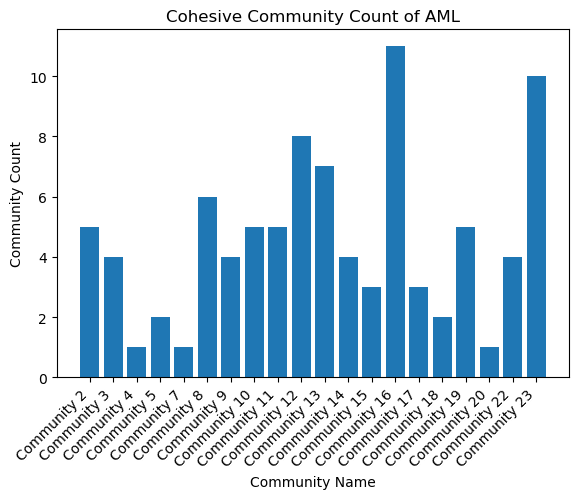

In [13]:
#coh_graphs(fost_coh_graph,'Fostamatinib','fostamatinib_coh_graph')
#coh_graphs(lasofoxifene_coh_graph,'Lasofoxifene','lasofoxifene_coh_graph')
#coh_graphs(zinc_coh_graph,'Zinc','zinc_coh_graph')
#coh_graphs(L_glutamic_acid_coh_graph,'L-Glutamic Acid','L_glutamic_acid_coh_graph')
#coh_graphs(AML_coh_graph,'AML','AML_coh_graph')

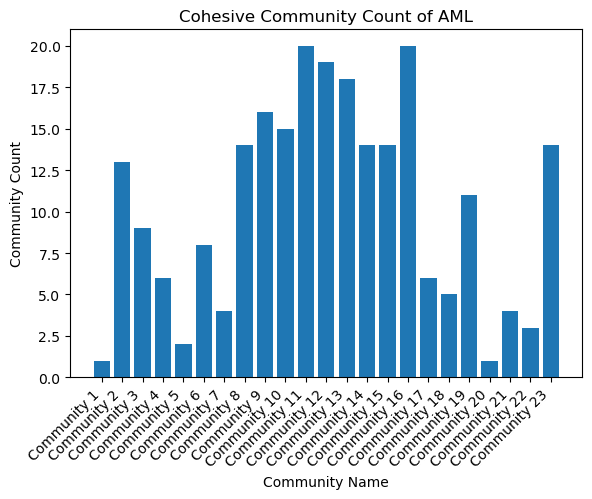

In [81]:
#coh_graphs(fost_coh_graph100,'Fostamatinib','graphnodes100/fostamatinib_coh_graph100')
#coh_graphs(lasofoxifene_coh_graph100,'Lasofoxifene','graphnodes100/lasofoxifene_coh_graph100')
#coh_graphs(zinc_coh_graph100,'Zinc','graphnodes100/zinc_coh_graph100')
#coh_graphs(L_glutamic_acid_coh_graph100,'L-Glutamic Acid','graphnodes100/L_glutamic_acid_coh_graph100')
#coh_graphs(AML_coh_graph100,'AML','graphnodes100/AML_coh_graph100')

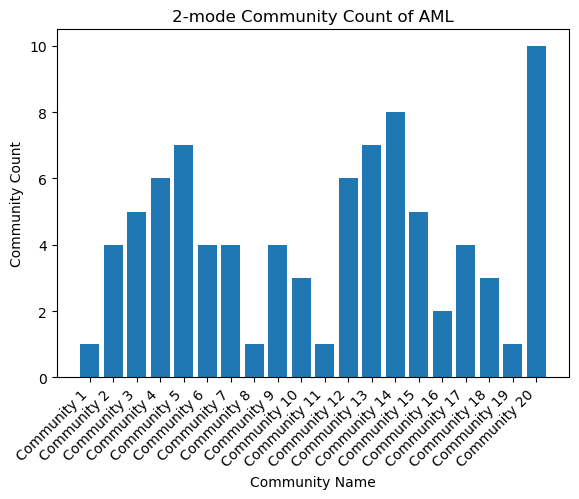

In [79]:
#mod_graphs(fost_mod_graph,'Fostamatinib','fostamatinib_mod_graph')
#mod_graphs(lasofoxifene_mod_graph,'Lasofoxifene','lasofoxifene_mod_graph')
#mod_graphs(zinc_mod_graph,'Zinc','zinc_mod_graph')
#mod_graphs(L_glutamic_acid_mod_graph,'L-Glutamic Acid','L_glutamic_acid_mod_graph')
#mod_graphs(AML_mod_graph,'AML','AML_mod_graph')

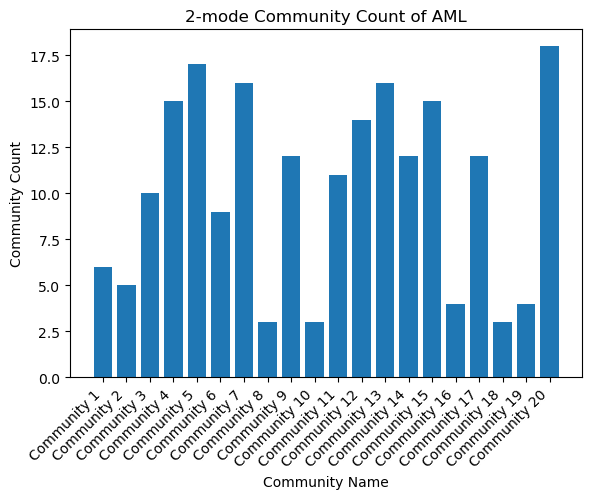

In [86]:
#mod_graphs(fost_mod_graph100,'Fostamatinib','graphnodes100/fostamatinib_mod_graph100')
#mod_graphs(lasofoxifene_mod_graph100,'Lasofoxifene','graphnodes100/lasofoxifene_mod_graph100')
#mod_graphs(zinc_mod_graph100,'Zinc','graphnodes100/zinc_mod_graph100')
#mod_graphs(L_glutamic_acid_mod_graph100,'L-Glutamic Acid','graphnodes100/L_glutamic_acid_mod_graph100')
#mod_graphs(AML_mod_graph100,'AML','graphnodes100/AML_mod_graph100')

# Identifying Important Communities

In [ ]:
# fostamatinib: cohesive 3320 (community 18-10) -   2-mode - 3265 (Community 1-14)
# lasofoxifene: cohesive - 86 (community 16-10) 2-mode - 6598 (Community 20-9) 
# zinc: cohesive - 6135, 9343, 6117 (community 2, community 8, community 23 - 4) 2-mode - 7157 (community 11 - 6)
# L-glutamic acid: cohesive -11335 (community 13-2) 2-mode -3329, 3065, 7514 (community 12, community 13, community 17 - 2)
# AML: cohesive - 86 (community 16-11), 2-mode - 6598 (community 20-10)

In [ ]:
# cohesive communities
#community 18 - 18_coh_com51.txt
#community 16 - 16_coh_com27.txt
# community 2 - 2_coh_com2.txt, community 8 - 8_coh_com7.txt, community 23 - 23_coh_com28.txt
# community 13 - 13_coh_com58.txt
# community 16 - 16_coh_com27.txt

In [ ]:
# 2-mode communities 
# community 1 - 1_mode2_com80.txt
# community 20 - 20_mode2_com26.txt
# community 11 - 11_mode2_com71.txt
# community 12 - 12_mode2_com9.txt, community 13 - 13_mode2_com44.txt, community 17 - 17_mode2_com41.txt
# community 20 - 20_mode2_com26.txt

In [11]:
# using a loop to iterate over the files of cohesive communities to save them in a csv file
selected_cohesive_path = 'C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\selected_cohesive_communities'
selected_mode2_path = 'C:\\Users\\SuruthyS\\Downloads\\multiscale-interactome-master(1)\\multiscale-interactome-master\\communities\\selected_2-mode_commuitites'

def community_table(communities_path):
  
    folder = os.listdir(communities_path)
    for file in folder:
        community_text = os.path.join(communities_path,file)
        community = open(community_text, "r")

# stores the text file into a list
        community_list = community.read().split("\t") 
        communities_dict = {'Nodes': community_list}
        communities_df = pd.DataFrame(communities_dict)
        communities_df.to_csv('{}\\{}_table.csv'.format(communities_path,file), index=False)
        community.close()


In [12]:
community_table(selected_cohesive_path)

In [13]:
community_table(selected_mode2_path)